In [1]:
# Install necessary libraries (uncomment to run)
# !pip install ultralytics
# !pip install opencv-python
# !pip install matplotlib


In [2]:
# Import necessary libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


0: 320x640 3 faces, 63.0ms
Speed: 3.0ms preprocess, 63.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)


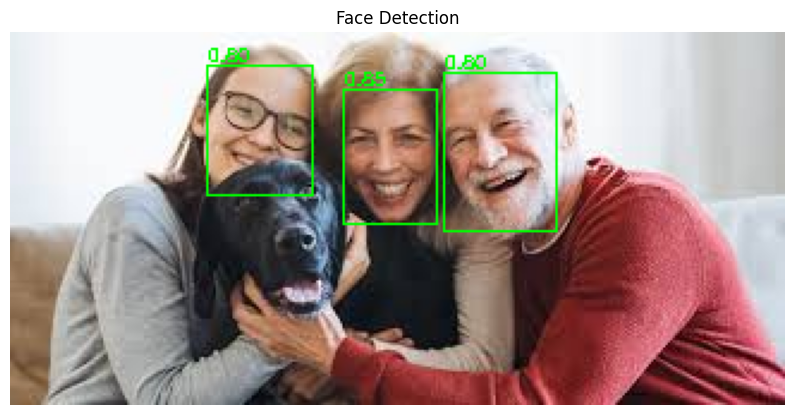

In [3]:
# Load a pre-trained YOLOv8 model
model = YOLO('models/yolov8n-face.pt')  # 'yolov8n.pt' is the Nano version; there are other versions

# Image path
image_path = "image_data/people-pet.jpg"

# Read the image
image = cv2.imread(image_path)

# Perform detection
results = model.predict(image)

# Filter for the "person" class (class ID 0 for the general YOLO models)
for result in results:
    for face in result.boxes:
        # Check if the detected object is a person (class_id 0 is usually 'person' in COCO dataset)
        if face.cls[0] == 0:  # The class ID for 'person' is 0 in the COCO dataset
            # Extract bounding box coordinates
            x1, y1, x2, y2 = map(int, face.xyxy[0])  # Convert coordinates to integers

            # Extract confidence score for the detection
            confidence = face.conf[0]  # Extract confidence from the Boxes object
            
            # Draw bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 1)
            
            # Put confidence score text above the bounding box
            cv2.putText(image, f'{confidence:.2f}', (x1, y1-2), cv2.FONT_HERSHEY_SIMPLEX, 0.25, (0, 255, 0), 1)

# Convert BGR image to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axes
plt.title('Face Detection')
plt.show()